In [2]:
from funciones import *

<img src="logoudesa.png" width="200" height="200" alt="udesa">


<h1><center> <font size="14">Trabajo Práctico 1<br> Análisis Matemático III </font></center></h1>

### Integrantes:
- Dehan Josefina
- Vulcano Facundo
- Hofkamp Nataly

### Punto 1.
 Nos dimos cuenta de que cumplen las propiedades de Dirichlet debido a la presencia de discontinuidades finitas, así como otras características relevantes. Para ilustrar este aspecto, presentamos gráficos que demuestran que trabajamos en intervalos específicos:

  - Señal diente de sierra en el intervalo [0, 2].
  - Señal tren de pulso en el intervalo [0, 4π].
  - Señal triangular en el intervalo [0, 4π].
  
Estos gráficos resaltan las características esenciales de las señales analizadas y respaldan nuestra observación de que cumplen las propiedades de Dirichlet.


Fenómeno de Gibbs en punto de discontinuidad 1:
Cantidad de armónicos: 10
Amplitud de Gibbs: 0.0
Fenómeno de Gibbs en punto de discontinuidad 2:
Cantidad de armónicos: 10
Amplitud de Gibbs: 0.42335897565353775
Fenómeno de Gibbs en punto de discontinuidad 3:
Cantidad de armónicos: 10
Amplitud de Gibbs: 0.6048057577969704
Fenómeno de Gibbs en punto de discontinuidad 4:
Cantidad de armónicos: 10
Amplitud de Gibbs: 0.7990953907247784
Fenómeno de Gibbs en punto de discontinuidad 1:
Cantidad de armónicos: 30
Amplitud de Gibbs: 0.0
Fenómeno de Gibbs en punto de discontinuidad 2:
Cantidad de armónicos: 30
Amplitud de Gibbs: 0.17059444378796518
Fenómeno de Gibbs en punto de discontinuidad 3:
Cantidad de armónicos: 30
Amplitud de Gibbs: 0.006839890036924756
Fenómeno de Gibbs en punto de discontinuidad 4:
Cantidad de armónicos: 30
Amplitud de Gibbs: 0.4236065922642799
Fenómeno de Gibbs en punto de discontinuidad 1:
Cantidad de armónicos: 50
Amplitud de Gibbs: 0.0
Fenómeno de Gibbs en punto de dis

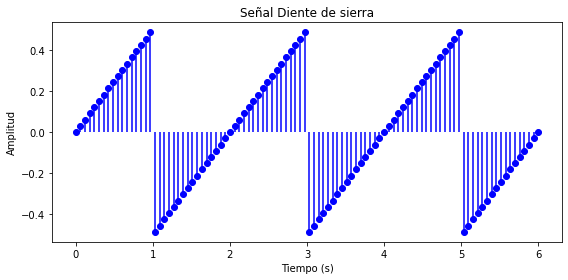

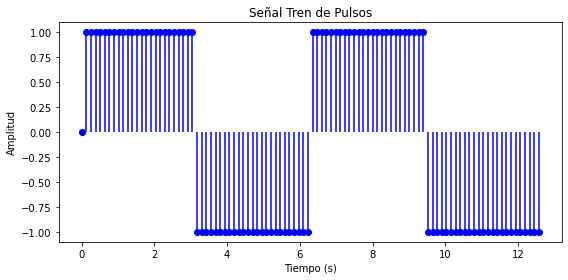

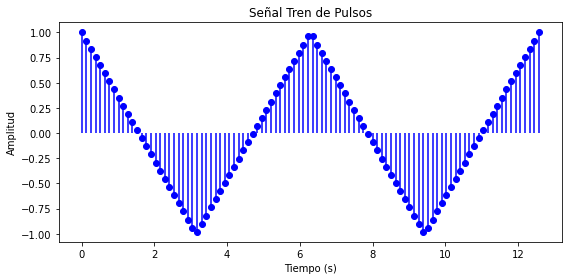

In [25]:
A = 1.0      
T = (2*np.pi)   
tren_pulsos, muestras_tren,series_tren= create_signal_serie(A,T,4*np.pi ,100,tren_de_pulsos,serie_tren_de_pulsos)
diente_sierra, muestras_diente,series_diente = create_signal_serie(A,2,6,100,diente_de_sierra,serie_diente_de_sierra)
señal_triangular, muestras_triangular, series_triangular = create_signal_serie(A, T, 4*np.pi, 100, triangular, serie_triangular)
plot(muestras_diente, diente_sierra, 'Señal Diente de sierra', 'Tiempo (s)', 'Amplitud', 'Diente de sierra')
plot(muestras_tren, tren_pulsos,'Señal Tren de Pulsos', 'Tiempo (s)', 'Amplitud', 'Tren de Pulsos')
plot(muestras_triangular, señal_triangular,'Señal Tren de Pulsos', 'Tiempo (s)', 'Amplitud', 'Tren de Pulsos')

### Punto 2: Cálculo de Series de Fourier
**Introducción**

Las Series de Fourier nos permiten descomponer una función periódica en una suma de funciones sinusoidales (senos y cosenos) o exponenciales complejas.

**Cálculo de Series de Fourier**

El cálculo de una Serie de Fourier para una función periódica $f(t)$ en un intervalo $T$ implica los siguientes pasos generales:

1. Determinar el período fundamental de la función $T$, que es el menor valor positivo de $T$ para el cual $f(t + T) = f(t)$ para todos los $t$.

2. Calcular los coeficientes de Fourier, que dependen del tipo de función y se utilizan para ponderar las componentes sinusoidales o exponenciales en la serie.

3. Escribir la Serie de Fourier en función de los coeficientes y las funciones base (senos y cosenos o exponenciales complejas).

**Cálculo de las Series Específicas**

Vamos a calcular las Series de Fourier para tres tipos de señales específicas:

1. **Tren de Pulsos**
Si miramos la función dada, es claro que: 

$$
\text{sign}(\sin(-w \cdot t)) = -\text{sign}(\sin(w \cdot t)) 
$$

por lo que la función es impar.
Así que, el tren de pulsos generado por la función `tren_de_pulsos` es una función impar.


   La ecuación para un tren de pulsos periódico en el intervalo $[0, T]$ es:
\begin{equation*}
F(x) = \sum_{n = 1}^{\infty} \frac{4}{T} A \left[[\frac{-\cos(nw \frac{T}{2}) - 1}{nw}] \sin(nwt)\right] 
\end{equation*}

2. **Señal Diente de Sierra**
La señal diente de sierra no es ni par ni impar ya que no cumple con ninguna condicion de simetria

   La ecuación para una señal diente de sierra periódica en el intervalo $[0, T]$ es:

\begin{equation*}
F(x) = \sum_{n = 1}^{\infty} \frac{4 A}{T^2}  \left[[-\frac{T(\cos(nw \frac{T}{2}))}{2nw} - \frac{\sin(nw \frac{T}{2})}{(wn)^2}]\right] \sin(nwt)
\end{equation*}


3. **Señal Triangular**
La señal triangular a analizar es una señal par ya que cumple con la caracteristica de que x(t) = x(-t) para todo t. La integracion fue realizada en el intervalo $[0, \frac{T}{2}]$ esto se debe a que al tener simetria par, solo fue necesario considerar la mitad de un periodo. Dado que la señal es periodica con periodo T, el intervalo completo seria $[0, T]$.

   La ecuación para una señal triangular periódica en el intervalo $[0, T]$ es:

\begin{equation*}
F(t) = \sum_{n \text{ impar}} \frac{8A}{n^2 \pi^2} \cos(n \omega_0 t)
\end{equation*}


## Punto 3. 

A continuación mostramos las funciones utilizadas para generar las Series de Fourier de cada señal. Estas, reciben el Periodo, la amplitud de las señales y la cantidad de armónicos utilizar.


In [26]:

def serie_diente_de_sierra(A,T, muestras, cant_armonicos):
    serie = []
    for t in muestras:
        armonicos = 0
        for n in range(1, cant_armonicos+1):
            w = (2*np.pi/T)
            a = (4*A/(T**2))
            alpha = w*n*T/2
            b = (T/(2*w*n))
            armonicos += (a*((b*(-np.cos(alpha)))+(np.sin(alpha)/((w*n)**2))) * np.sin(w*n*t))
        serie.append(armonicos)
    return serie

def serie_tren_de_pulsos(A,T, muestras, cant_armonicos):
    serie = []
    w= (2*np.pi/T)
    for t in muestras:
        armonicos = 0
        for n in range(1, cant_armonicos + 1):
            armonicos += ((4*A/(T*n*w))*(1-np.cos(n*w*T/2)) * np.sin(n *w * t))
        serie.append(armonicos)
    return serie

def serie_triangular(A, T, muestras, cant_armonicos):
    serie = []
    w0 = 2 * np.pi / T
    for t in muestras:
        armonicos = 0
        for n in range(1, cant_armonicos + 1):
            armonicos += ((8 * A / (np.pi**2)) * ((-1)**((n-1)//2)) * np.sin(n * w0 * t) / n**2)
        serie.append(armonicos)
    return serie

## Punto 4.
A continuación, se presentan los gráficos para cada señal. Se observa que a mayor cantidad de armónicos, nuestra serie se acerca más a la señal original, ya que las ondulaciones son menores y puede simular una línea en algunos intervalos, por lo general, cuanto más alejados estén de los puntos de discontinuidad. Se evidencian picos en los puntos de discontinuidad, pero a su vez se observa una reducción en ellos a medida que aumentan los armónicos

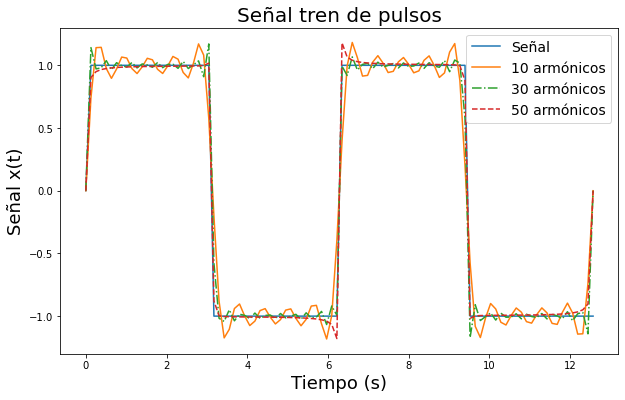

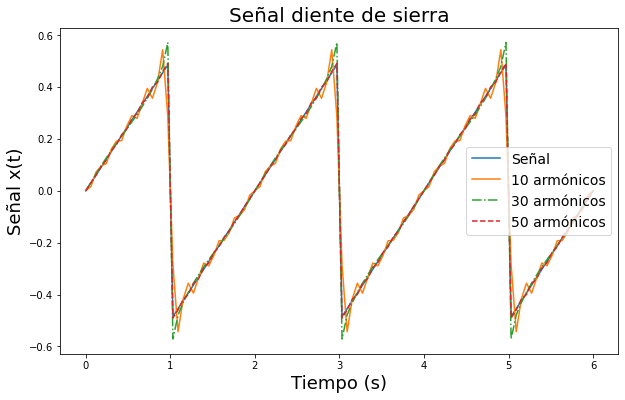

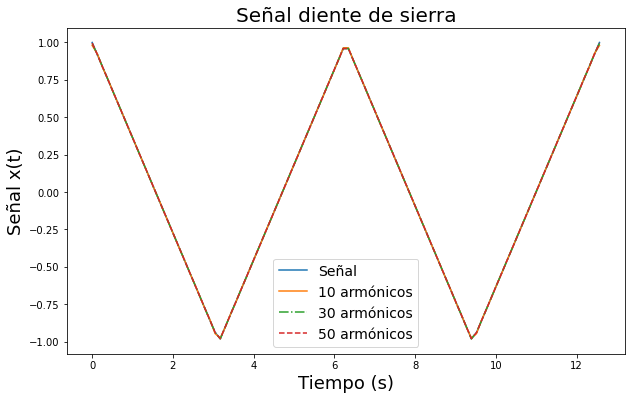

In [27]:
graphs(muestras_tren,tren_pulsos,series_tren,'Señal tren de pulsos')
graphs(muestras_diente,diente_sierra,series_diente,'Señal diente de sierra')
graphs(muestras_triangular,señal_triangular,series_triangular,'Señal diente de sierra')

## Punto 5. fenómeno de Gibbs.
Al realizar las pruebas del fenómeno de gibbs en los puntos de discontinuidad de cada función observamos los siguientes resultados 
A medida que aumentamos la cantidad de armónicos en la serie, las amplitudes de Gibbs disminuyen, lo cual es un comportamiento esperado. Este comportamiento es una propiedad del fenómeno de Gibbs y se refleja en la disminución de la magnitud de las oscilaciones en los puntos de discontinuidad a medida que se consideran más armónicos.


1. **Señal Trem de Pulsos**  (cambiar los números por las coordenadas)


| Punto de Discontinuidad | Cantidad de Armónicos | Amplitud de Gibbs |
|-------------------------|------------------------|--------------------|
| 2                       | 10                     | 0.42335897565353786|
| 3                       | 10                     | 0.6048057577969704 |
| 4                       | 10                     | 0.7990953907247784 |
| 2                       | 30                     | 0.17059444378796496|
| 3                       | 30                     | 0.006839890036924756|
| 4                       | 30                     | 0.4236065922642799 |
| 2                       | 50                     | 0.017473927832714953|
| 3                       | 50                     | 0.17901169427515629|
| 4                       | 50                     | 0.12090421850611177|

En la tabla proporcionada, se presentan los resultados de la amplitud del fenómeno de Gibbs para puntos de discontinuidad específicos en señales aproximadas mediante Series de Fourier. Sin embargo, el punto 1 no figura en la tabla, esta señal comienza en el punto 1 con una transición suave desde cero hasta su valor máximo. Esta transición suave no representa una discontinuidad, ya que la señal es continua y no experimenta un cambio abrupto en ese punto. 


2. **Señal Diente de Sierra**  

| Punto de Discontinuidad | Cantidad de Armónicos | Amplitud de Gibbs |
|------------------------|-----------------------|-------------------|
| 1                      | 10                    | 0.0888007995456066|
| 2                      | 10                    | 0.19892398375832038|
| 3                      | 10                    | 0.08880079954560627|
| 4                      | 10                    | 0.19892398375831966|
| 5                      | 10                    | 0.08880079954560594|
| 6                      | 10                    | 0.19892398375831905|
| 1                      | 30                    | 0.024509599346801136|
| 2                      | 30                    | 0.0865245616602166|
| 3                      | 30                    | 0.024509599346800526|
| 4                      | 30                    | 0.08652456166021705|
| 5                      | 30                    | 0.02450959934680008|
| 6                      | 30                    | 0.08652456166021771|
| 1                      | 50                    | 0.004757972412938405|
| 2                      | 50                    | 0.005596544483390975|
| 3                      | 50                    | 0.00475797241293846|
| 4                      | 50                    | 0.005596544483389754|
| 5                      | 50                    | 0.00475797241293785|
| 6                      | 50                    | 0.005596544483390087|

3. **Señal Triangular**
La señal triangular es un ejemplo de una senial periodica sin discontinuidades. Aunque se podria esperar que la aproximacion por series de Fourier sea perfecta debido a la ausencia de discontinuidades, en la practica, la reconstruccion de la senial utilziando un numero finito de armonicos no sera exacta. En la siguiente tabla no muestramos el fenomeno de gibbs para la triangular sino que el erorr observado al aproximar esta senial con un numero determinado de armonicos.


| Punto de "Discontinuidad" | Cantidad de Armónicos | Error    |
|--------------------------|-----------------------|-----------------------------|
| 1                        | 10                    | 0.020247408507700237        |
| 2                        | 10                    | 0.005543044835911393        |
| 1                        | 30                    | 0.0067541203797634175       |
| 2                        | 30                    | 0.0007478521083831291       |
| 1                        | 50                    | 0.004052712269688841        |
| 2                        | 50                    | 7.4072915605682965e-06      |



### Punto 6. Error Cuadrático
En esta seccion se intenta aproximar una señal utilizando la Serie de Fourier y luego determinar cuántos armónicos son necesarios para alcanzar un valor de Error Cuadrático Medio (ECM) deseado. Las funciones son las siguientes:

1. `calculate_ECM(signal, approx)`: Esta función calcula el ECM entre una señal original y su aproximación. Toma dos arrays, `signal` y `approx`, y devuelve la media de las diferencias cuadradas entre los elementos de `signal` y `approx`.

2. `calculate_ECM_excluding_discontinuities(signal, approx, discontinuity_indices)`: Esta función calcula el ECM excluyendo los puntos de discontinuidad en la señal original. Toma los mismos parámetros que `calculate_ECM` junto con un array `discontinuity_indices` que contiene los índices de los puntos de discontinuidad. La función elimina estos puntos antes de calcular el ECM.

3. `approximate_signal(A, T, muestras, signal, serie, target_ECM)`: Esta función es el corazón del procedimiento. Aproxima una señal utilizando la Serie de Fourier con un número creciente de armónicos hasta que el ECM sea menor o igual al valor deseado `target_ECM`. Los parámetros de entrada son:
   - `A`: Amplitud máxima de la serie de Fourier.
   - `T`: Período de la señal.
   - `muestras`: Número de muestras de la señal.
   - `signal`: La señal original a aproximar.
   - `serie`: Una función que calcula la aproximación de la señal utilizando la Serie de Fourier con un número dado de armónicos.
   - `target_ECM`: El valor de ECM deseado.

   La función inicia con un ECM inicial infinito y va aumentando el número de armónicos uno por uno hasta que se alcanza o se supera el `target_ECM`. Lleva un registro de los valores de ECM a lo largo de este proceso y finalmente traza un gráfico para visualizar cómo cambia el ECM en función del número de armónicos. El gráfico utiliza una escala logarítmica en el eje y para una mejor visualización.

   Al final, la función devuelve la cantidad de armónicos necesarios para alcanzar el `target_ECM`.


In [28]:
def calculate_ECM(signal, approx, auto_threshold=False):
    N = 0
    e = 0
    if auto_threshold:
        threshold = np.max(np.abs(np.diff(signal))) * 0.1
    else:
        threshold = 0.1  # Puedes ajustar este valor manualmente si no deseas el umbral automático
    
    for i in range(len(signal) - 1):
        if np.abs(signal[i] - signal[i + 1]) < threshold:
            N += 1
            e += (signal[i] - approx[i])**2
    
    if N > 0:
        e *= 1/N
    else:
        e = 0.0
    
    return e

def calculate_ECM_excluding_discontinuities(signal, approx, discontinuity_indices):
    
    discontinuity_indices = np.array(discontinuity_indices)
    valid_indices = np.delete(np.arange(len(signal)), discontinuity_indices)
    return np.mean((signal[valid_indices] - approx[valid_indices])**2)


## Punto 7. 
El Error Cuadrático Medio (ECM) se utiliza para cuantificar la discrepancia entre la señal original y su aproximación, y para reducir este error a un valor específico, se requiere un número determinado de armónicos. A medida que aumenta la cantidad de armónicos, el error tiende a disminuir, lo que significa que la aproximación se vuelve más precisa y se acerca cada vez más a la señal original. Por lo tanto, el número de armónicos necesario para alcanzar un nivel de precisión deseado. 



In [29]:
def approximate_signal(A, T, muestras, signal, serie, target_ECM, auto_threshold=False):

    current_ECM = np.inf 
    cant_armonicos = 0
    discontinuity_indices = np.where(np.diff(signal) != 0)[0]  
    total_ECM_values = []  
    valid_ECM_values = []  
    while current_ECM > target_ECM and cant_armonicos < 500:
        cant_armonicos += 1
        approx_signal = np.array(serie(A, T, muestras, cant_armonicos))
        current_ECM = calculate_ECM(signal, approx_signal, auto_threshold)
        valid_ECM = calculate_ECM_excluding_discontinuities(signal, approx_signal, discontinuity_indices)
        total_ECM_values.append(current_ECM)
        valid_ECM_values.append(valid_ECM)

    print(f'Armónicos: {cant_armonicos}, ECM Total: {current_ECM}, ECM Excluyendo Discontinuidades: {valid_ECM}')

    plt.figure(figsize=(12, 6))
    plt.plot(range(1, cant_armonicos + 1), total_ECM_values, label='ECM Total')
    plt.plot(range(1, cant_armonicos + 1), valid_ECM_values, label='ECM Excluyendo Discontinuidades')
    plt.title('Error Cuadrático Medio (ECM) vs. Cantidad de Armónicos')
    plt.xlabel('Cantidad de Armónicos')
    plt.ylabel('ECM')
    plt.yscale('log')  
    plt.legend()
    plt.show()

    return cant_armonicos


| Señal               | Error Esperado | ECM       | Cantidad de Armónicos |
|---------------------|----------------|-----------|------------------------|
| Tren de Pulsos      | 0.5            | 0.1877    | 1                      |
| Diente de Sierra    | 0.5            | 0.1321    | 1                      |
| Triangular          | 0.5            | 0.6889    | 500                    |
| Tren de Pulsos      | 0.1            | 0.0986    | 3                      |
| Diente de Sierra    | 0.1            | 0.1311    | 500                    |
| Triangular          | 0.1            | 0.6889    | 500                    |
| Tren de Pulsos      | 0.01           | 0.0100    | 500                    |
| Diente de Sierra    | 0.01           | 0.1311    | 500                    |
| Triangular          | 0.01           | 0.6889    | 500                    |


## Punto 8.
Tren de Pulsos:
A medida que aumentamos el número de armónicos en la serie de Fourier para aproximar un tren de pulsos, notamos que la precisión de la aproximación mejora. Inicialmente, el error cuadrático medio (ECM) disminuye rápidamente, ya que los armónicos adicionales permiten representar con mayor detalle los picos de la señal. Sin embargo, a medida que continuamos agregando armónicos, el ECM disminuye a una tasa cada vez menor debido al fenómeno de Gibbs, que causa oscilaciones cerca de los puntos de discontinuidad en la señal. Eventualmente, el ECM converge a un valor mínimo, pero nunca alcanza cero debido a estas discontinuidades.

Diente de Sierra:
Al aumentar el número de armónicos para aproximar una señal de diente de sierra, observamos un patrón similar al del tren de pulsos. La aproximación se vuelve más precisa a medida que agregamos más armónicos, y el ECM disminuye inicialmente de manera significativa. Sin embargo, nuevamente encontramos el fenómeno de Gibbs, que causa oscilaciones cerca de los puntos de discontinuidad en la señal. A medida que continuamos aumentando los armónicos, el ECM disminuye a una tasa cada vez menor y converge a un valor mínimo, pero nunca llega a cero debido a las discontinuidades.

Señal Triangular:
En el caso de una señal triangular, que es más suave en comparación con el tren de pulsos y el diente de sierra, el aumento en el número de armónicos conduce a una convergencia más rápida y suave. La aproximación mejora notablemente a medida que se agregan armónicos, y el ECM disminuye significativamente en sus primeras etapas. A diferencia de las señales más abruptas, la presencia del fenómeno de Gibbs es menos pronunciada en la señal triangular, lo que permite una convergencia más rápida y una disminución más suave del ECM. Al aumentar arbitrariamente el número de armónicos, el ECM converge a un valor mínimo y se acerca considerablemente a cero debido a la suavidad de la señal triangular.


En resumen, al analizar el efecto de aumentar arbitrariamente el número de armónicos utilizados en la aproximación mediante la serie de Fourier para diferentes tipos de señales, observamos un patrón común en el comportamiento del error cuadrático medio (ECM). A medida que aumentamos los armónicos, la aproximación se vuelve más precisa y el ECM disminuye. Sin embargo, este descenso no es lineal, ya que el fenómeno de Gibbs introduce oscilaciones cerca de los puntos de discontinuidad en las señales, lo que limita la reducción del ECM.

In [3]:
def graphs(muestras, signal_, series, title):

    plt.figure(figsize=(10, 6))
    plt.plot(muestras, signal_, label='Señal')
    for serie, cant_armonicos, linestyle in series:
        plt.plot(muestras, serie, label=f'{cant_armonicos} armónicos', linestyle=linestyle)
    plt.title(title, fontsize=20)
    plt.xlabel('Tiempo (s)', fontsize=18)
    plt.ylabel('Señal x(t)', fontsize=18)
    plt.legend(fontsize=14)
    plt.show()

def create_signal_serie(A, T, periodo, cant_muestras, signal, serie):

    muestras = np.linspace(0, periodo, cant_muestras)
    signal_ = signal(A, T, muestras)
    series = []
    for cant_armonicos, linestyle in [(10, 'solid'), (30, '-.'), (50, '--')]:
        serie_ = serie(A, T, muestras, cant_armonicos)
        series.append((serie_, cant_armonicos, linestyle))
    fenomeno_gibbs(signal_, series, T)
    return (signal_, muestras, series)

Armónicos: 500, ECM Total: 0.13038939361302626, ECM Excluyendo Discontinuidades: 0.00204162196821204


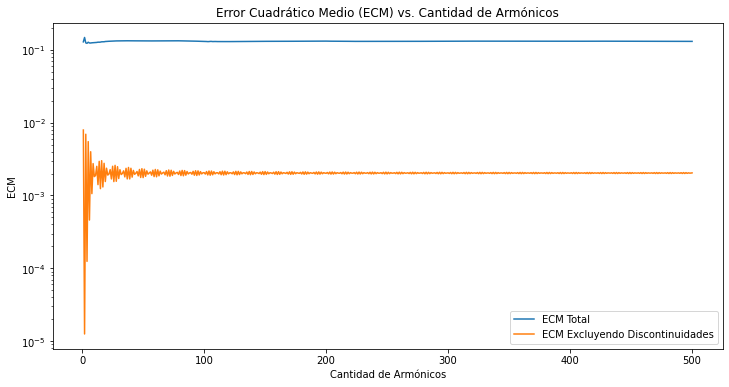

Armónicos: 17, ECM Total: 0.008687010267270623, ECM Excluyendo Discontinuidades: 0.019013187243653095


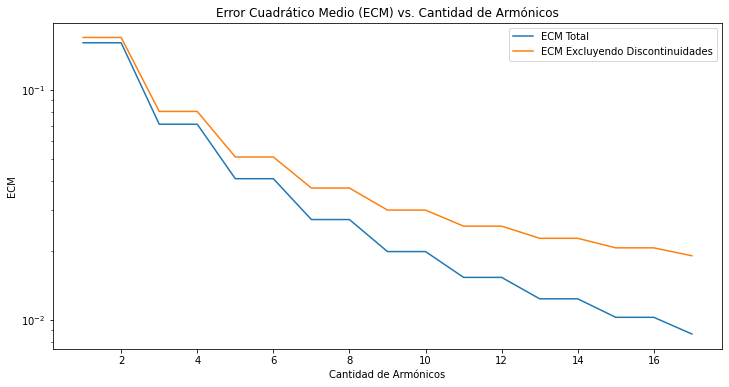

Armónicos: 500, ECM Total: 0.6887676876054771, ECM Excluyendo Discontinuidades: 1.0000000000000004


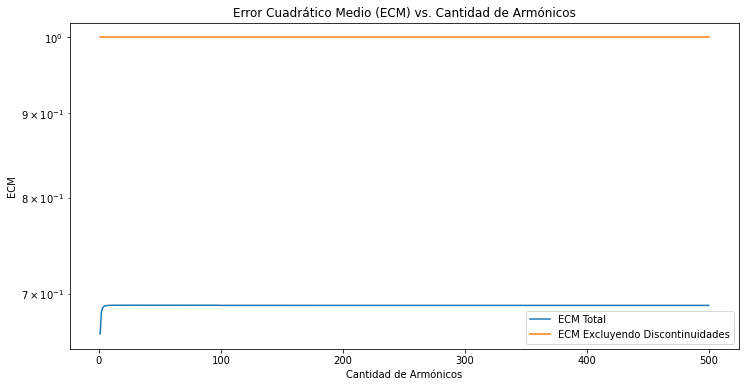

500

In [31]:
approximate_signal(A,T,muestras_diente,diente_sierra,serie_diente_de_sierra,0.01)
approximate_signal(A,T,muestras_tren,tren_pulsos,serie_tren_de_pulsos,0.01)
approximate_signal(A,T,muestras_triangular,señal_triangular,serie_triangular,0.01)